#### Thiago Moutinho de Carvalho Maksoud DRE:119048139

### Importando bibliotecas necessárias

In [294]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import re

### Baixar arquivos:

In [295]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")

"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m.zip\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n\n'

In [296]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")
"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n'

In [297]:
# Lendo o arquivo movies.dat
filepath_movies = os.path.join('data/ml-1m', 'movies.dat')
filepath_ratings = os.path.join('data/ml-1m', 'ratings.dat')
filepath_users  = os.path.join ('data/ml-1m', 'users.dat')

df_movies = pd.read_csv(
    filepath_movies,
    delimiter='::',
    engine='python',
    names=['MovieID', 'Title', 'Genres'],
    encoding='latin1'
)

# Lendo o arquivo ratings.dat
df_ratings = pd.read_csv(
    filepath_ratings,
    delimiter='::',
    engine='python',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='latin1'
)

# Lendo o arquivo users.dat
df_users = pd.read_csv(
    filepath_users,
    delimiter='::',
    engine='python',
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='latin1'
)

print(df_movies.head())
print(df_ratings.head())
print(df_users.head())


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### Faremos agora uma análise exploratória dos dados

In [298]:
print(df_movies.shape)
print(df_ratings.shape)
print(df_users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


##### 3883 filmes 1000209 avaliações e 6040 usuários

In [299]:
null_counts = df_movies.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 MovieID    0
Title      0
Genres     0
dtype: int64


In [300]:
null_counts = df_ratings.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [301]:
null_counts = df_users.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Nenhum valor nulo

Para facilitar vamos tirar o ano do filme do nome, e por em uma nova coluna

In [302]:
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

df_movies['Year'] = df_movies['Title'].apply(extract_year)
print(df_movies.head())

   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   Year  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  


##### Vamos fazer um gráfico de quantidade de filmes x ano

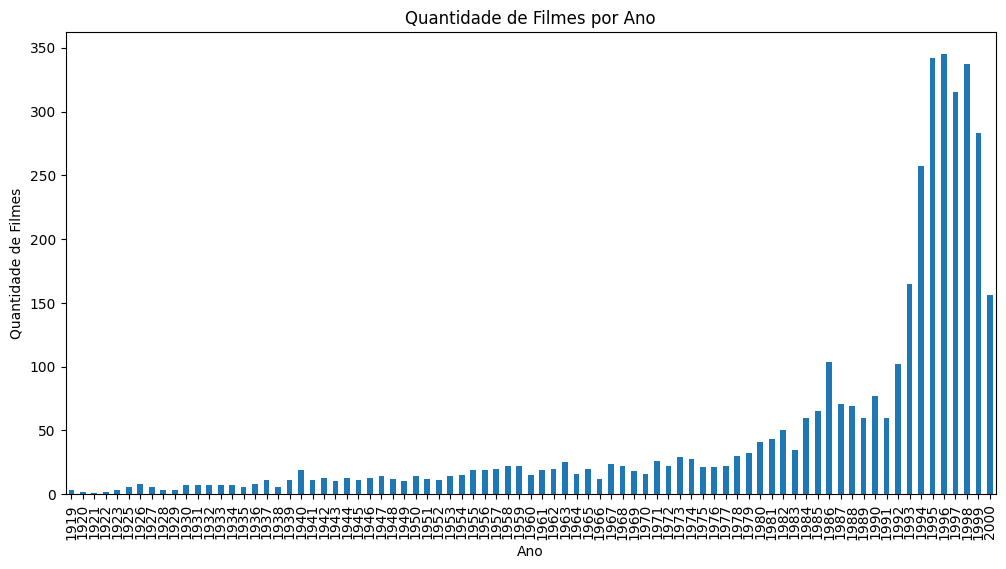

In [303]:
movies_per_year = df_movies['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Ano')
plt.show()


##### Podemos ver que a gigante maioria dos filmes é da década de 90

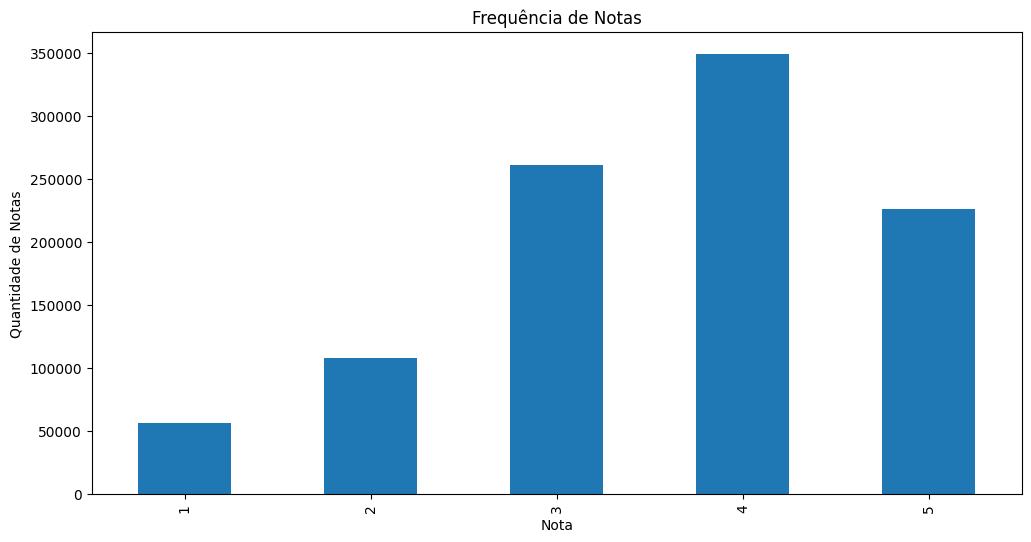

In [304]:
ratings = df_ratings['Rating'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ratings.plot(kind='bar')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Notas')
plt.title('Frequência de Notas')
plt.show()

##### Pouquíssimas notas baixas!

Separando agora por genero

In [305]:
from collections import Counter

def count_genres(genres_series):
    genre_count = Counter()
    for genres in genres_series:
        genre_list = genres.split('|')
        genre_count.update(genre_list)
    return genre_count

genre_count = count_genres(df_movies['Genres'])
print(genre_count)

Counter({'Drama': 1603, 'Comedy': 1200, 'Action': 503, 'Thriller': 492, 'Romance': 471, 'Horror': 343, 'Adventure': 283, 'Sci-Fi': 276, "Children's": 251, 'Crime': 211, 'War': 143, 'Documentary': 127, 'Musical': 114, 'Mystery': 106, 'Animation': 105, 'Fantasy': 68, 'Western': 68, 'Film-Noir': 44})


Vamos converter para um dataframe so para facilitar o grafico

In [306]:
df_genres = pd.DataFrame.from_dict(genre_count, orient='index', columns=['Frequency'])
df_genres = df_genres.reset_index().rename(columns={'index': 'Genre'})
print(df_genres)

          Genre  Frequency
0     Animation        105
1    Children's        251
2        Comedy       1200
3     Adventure        283
4       Fantasy         68
5       Romance        471
6         Drama       1603
7        Action        503
8         Crime        211
9      Thriller        492
10       Horror        343
11       Sci-Fi        276
12  Documentary        127
13          War        143
14      Musical        114
15      Mystery        106
16    Film-Noir         44
17      Western         68


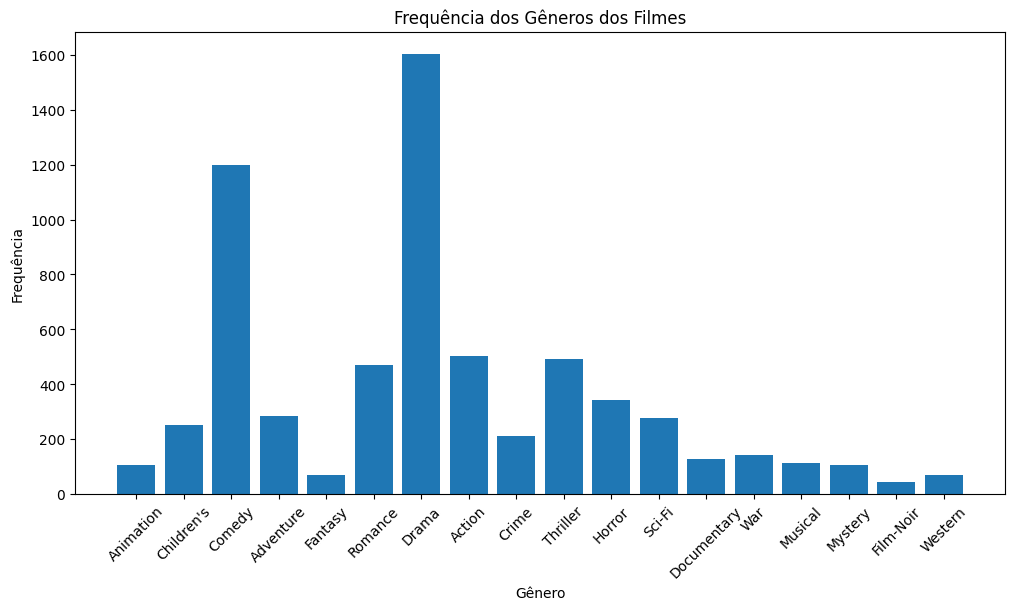

In [307]:
plt.figure(figsize=(12, 6))
plt.bar(df_genres['Genre'], df_genres['Frequency'])
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Frequência dos Gêneros dos Filmes')
plt.xticks(rotation=45)
plt.show()

Muito mais filmes de comedia e drama

### Pré-processamento dos dados:

Ja vimos que nao tem valores nulos

##### Buscando valores duplicados:

In [308]:
duplicated_counts = df_movies.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [309]:
duplicated_counts = df_ratings.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [310]:
duplicated_counts = df_users.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [311]:
df_genres.head()

,Genre,Frequency
0,Animation,105
1,Children's,251
2,Comedy,1200
3,Adventure,283
4,Fantasy,68


##### Normalizando os dados

In [312]:
df_genres = df_movies['Genres'].str.get_dummies(sep='|')

In [313]:
df_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [314]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_genres)

In [315]:
df_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [316]:
from scipy.spatial.distance import pdist, squareform

dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

print("Matriz de Distâncias Euclidianas:")
print(dist_matrix_square)

Matriz de Distâncias Euclidianas:
[[ 0.         10.75230503  7.9956348  ...  7.95967772  7.95967772
   8.50845673]
 [10.75230503  0.         10.17471128 ...  9.67392658  9.67392658
  10.13026267]
 [ 7.9956348  10.17471128  0.         ...  4.26505577  4.26505577
   5.21805204]
 ...
 [ 7.95967772  9.67392658  4.26505577 ...  0.          0.
   3.00622128]
 [ 7.95967772  9.67392658  4.26505577 ...  0.          0.
   3.00622128]
 [ 8.50845673 10.13026267  5.21805204 ...  3.00622128  3.00622128
   0.        ]]


vamos fazer um heatmap para ver as matrizes de distancias

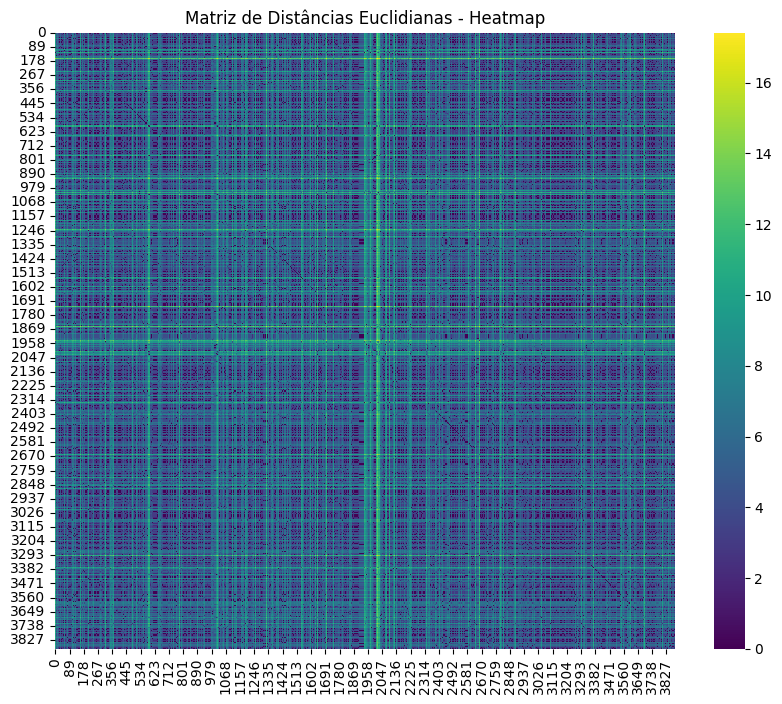

In [317]:
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix_square, cmap='viridis')
plt.title('Matriz de Distâncias Euclidianas - Heatmap')
plt.show()

Preparando as matrizes de distancias para o users

In [318]:
df_users_encoded = pd.get_dummies(df_users, columns=['Gender', 'Occupation'])

In [319]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_users_encoded.drop(columns=['UserID', 'Zip-code']))

In [320]:
dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

In [321]:
user_ids = df_users['UserID'].tolist()

agora para o ratings

In [322]:
ratings_matrix = df_ratings.pivot(index='MovieID', columns='UserID', values='Rating').fillna(0)

In [323]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(ratings_matrix)

In [324]:
dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

In [325]:
titles = df_movies.set_index('MovieID').loc[ratings_matrix.index, 'Title'].tolist()

#### Aplicando K means

In [326]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_genres)
kmeans = KMeans(n_clusters=5, random_state=42)  # Exemplo com 5 clusters
kmeans.fit(data_normalized)
labels = kmeans.labels_
df_movies['ClusterK'] = labels

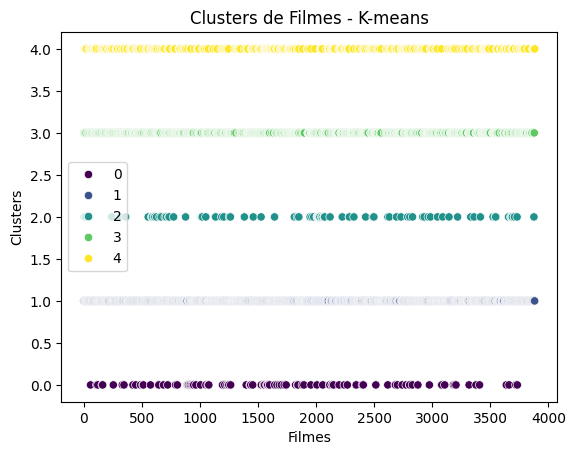

In [327]:
sns.scatterplot(x=df_movies.index, y=labels, hue=labels, palette='viridis')
plt.title('Clusters de Filmes - K-means')
plt.xlabel('Filmes')
plt.ylabel('Clusters')
plt.show()

In [328]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
wcss_5 = kmeans.inertia_
silhouette_avg_5 = silhouette_score(data_normalized, labels)
db_score_5 = davies_bouldin_score(data_normalized, labels)

O K-means conseguiu particionar os filmes em clusters distintos, mostrando que há uma estrutura subjacente nos dados que permite essa divisão. O cluster 0 (roxo) possui uma alta densidade de filmes em comparação com outros clusters.

#### Aplicando DBSCAN

In [329]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Parâmetros de exemplo
dbscan.fit(data_normalized)
labels = dbscan.labels_
df_movies['ClusterDBSCAN'] = labels

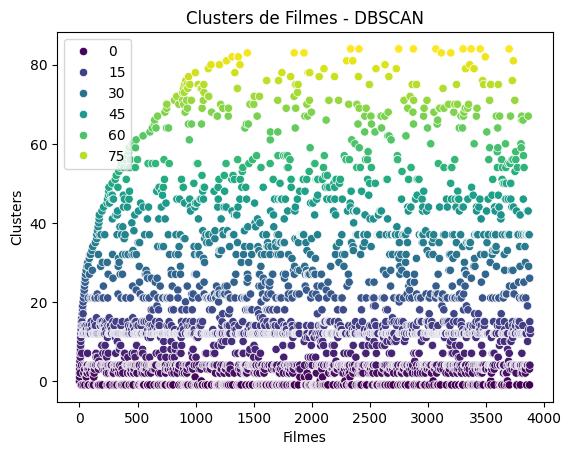

In [330]:
sns.scatterplot(x=df_movies.index, y=labels, hue=labels, palette='viridis')
plt.title('Clusters de Filmes - DBSCAN')
plt.xlabel('Filmes')
plt.ylabel('Clusters')
plt.show()

DBSCAN encontrou muitos clusters (até aproximadamente 80) em comparação com o K-means, que encontrou apenas 5 clusters. A presença de muitos clusters indica que há uma variação significativa na densidade dos dados. Alguns filmes estão agrupados em clusters muito pequenos, enquanto outros estão em clusters maiores.

Aplicando AgglomerativeClustering

In [331]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Exemplo com 5 clusters
agg_clustering.fit(data_normalized)
labels = agg_clustering.labels_
df_movies['ClusterAgg'] = labels


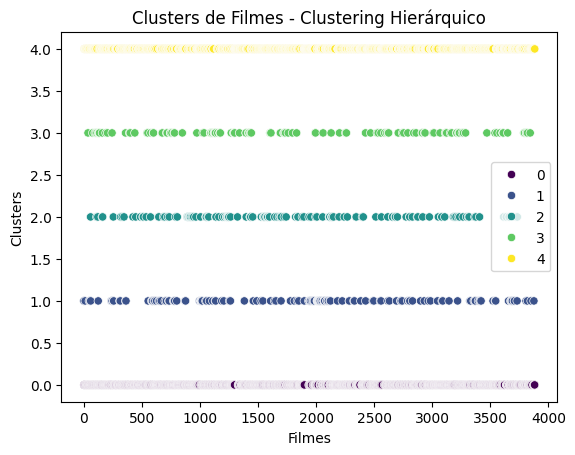

In [332]:
sns.scatterplot(x=df_movies.index, y=labels, hue=labels, palette='viridis')
plt.title('Clusters de Filmes - Clustering Hierárquico')
plt.xlabel('Filmes')
plt.ylabel('Clusters')
plt.show()

Esta bem similar ao kmeans

## vamos variar o numero de clusters

In [333]:
scaler = StandardScaler()
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_genres)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)


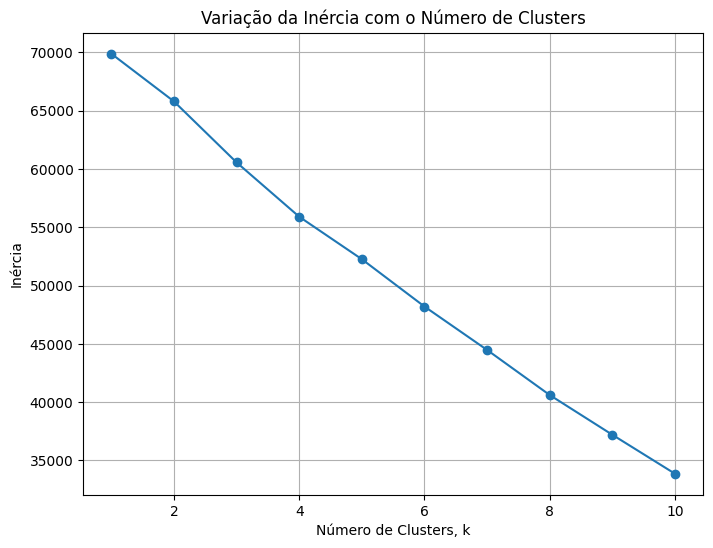

In [334]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters, k')
plt.ylabel('Inércia')
plt.title('Variação da Inércia com o Número de Clusters')
plt.grid(True)
plt.show()

esse metodo diz que o melhor numero de clusters se encontra no ponto de maior mudanca de inclinacao no caso 5 clusters

Vamos usar o z_score para remover outliers

In [335]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_movies.select_dtypes(include=[np.number])))
data_no_outliers_z = df_movies[(z_scores < 3).all(axis=1)]

outliers_z = df_movies[~((z_scores < 3).all(axis=1))]
print("Filmes removidos com base no Z-score:")
print(outliers_z)


Filmes removidos com base no Z-score:
      MovieID                                      Title  \
882       894                            Liebelei (1933)   
893       905               It Happened One Night (1934)   
895       907                   Gay Divorcee, The (1934)   
933       945                             Top Hat (1935)   
938       950                       Thin Man, The (1934)   
...       ...                                        ...   
3697     3766                   Missing in Action (1984)   
3698     3767  Missing in Action 2: The Beginning (1985)   
3699     3768     Braddock: Missing in Action III (1988)   
3736     3805                        Knightriders (1981)   
3862     3932                  Invisible Man, The (1933)   

                      Genres  Year  ClusterK  ClusterDBSCAN  ClusterAgg  
882                  Romance  1933         1             18           0  
893                   Comedy  1934         3              4           0  
895   Comedy|Musica

In [336]:
df_genres = data_no_outliers_z['Genres'].str.get_dummies(sep='|')

In [337]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_genres)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_normalized)
labels = kmeans.labels_
data_no_outliers_z['ClusterK'] = labels

C:\Users\thiag\AppData\Local\Temp\ipykernel_20912\2827218797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers_z['ClusterK'] = labels


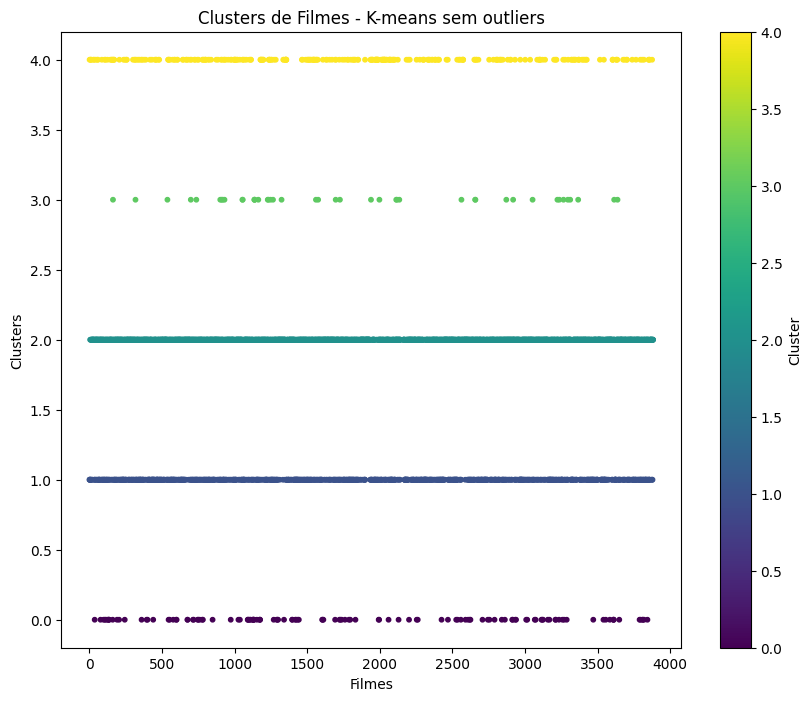

In [338]:
plt.figure(figsize=(10, 8))
plt.scatter(data_no_outliers_z.index, data_no_outliers_z['ClusterK'], c=data_no_outliers_z['ClusterK'], cmap='viridis', s=10)
plt.xlabel('Filmes')
plt.ylabel('Clusters')
plt.title('Clusters de Filmes - K-means sem outliers')
plt.colorbar(label='Cluster')
plt.show()

In [339]:
wcss_4 = kmeans.inertia_
silhouette_avg_4 = silhouette_score(data_normalized, labels)
db_score_4 = davies_bouldin_score(data_normalized, labels)

### Fazendo a comparacao entre o primeiro e o segundo kmeans

In [340]:
print(f"K-means sem outliers:")
print(f"WCSS: {wcss_4}")
print(f"Silhouette Score: {silhouette_avg_4}")
print(f"Davies-Bouldin Score: {db_score_4}")

print(f"\nK-means com outliers:")
print(f"WCSS: {wcss_5}")
print(f"Silhouette Score: {silhouette_avg_5}")
print(f"Davies-Bouldin Score: {db_score_5}")

K-means sem outliers:
WCSS: 50351.68051136967
Silhouette Score: 0.19997038460048938
Davies-Bouldin Score: 1.6017631603137812

K-means com outliers:
WCSS: 52265.369297486825
Silhouette Score: 0.19994258711479376
Davies-Bouldin Score: 1.7605049240233064


Todas as metricas sao melhores para sem outliers, o que mostra que a remocao foi eficiente

### Aplicando PCA

In [341]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_no_outliers_z.select_dtypes(include=[np.number]))


In [342]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['ClusterK'] = labels

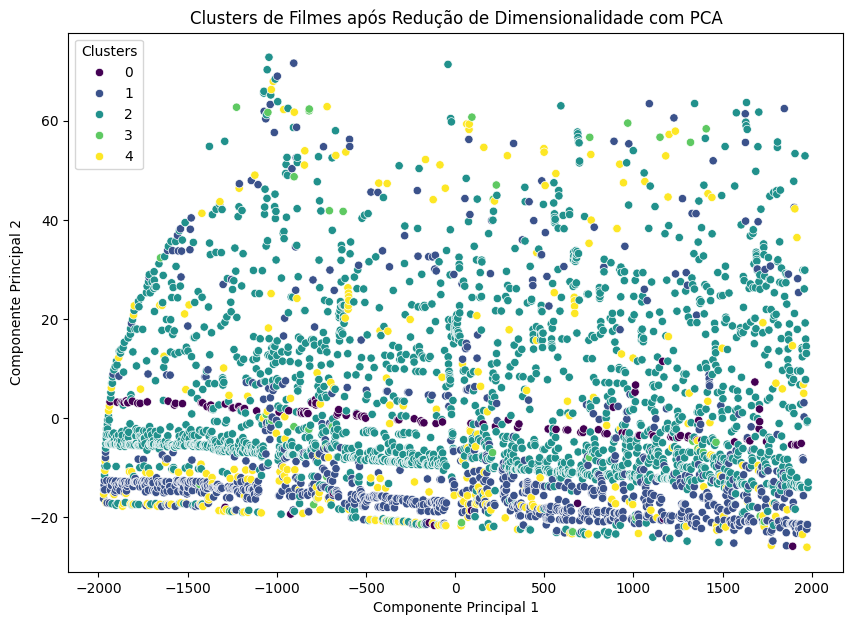

In [343]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='ClusterK', palette='viridis', data=pca_df)
plt.title('Clusters de Filmes após Redução de Dimensionalidade com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.show()

A sobreposição dos clusters em algumas áreas pode indicar que os clusters ainda possuem alguma interseção nas características dos filmes. No entanto, a PCA ajuda a visualizar a separação e a distribuição geral.

In [344]:
data_no_outliers_z.head()

,MovieID,Title,Genres,Year,ClusterK,ClusterDBSCAN,ClusterAgg
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1,0,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,4,1,1
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1,2,0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1,3,0
4,5,Father of the Bride Part II (1995),Comedy,1995,1,4,0


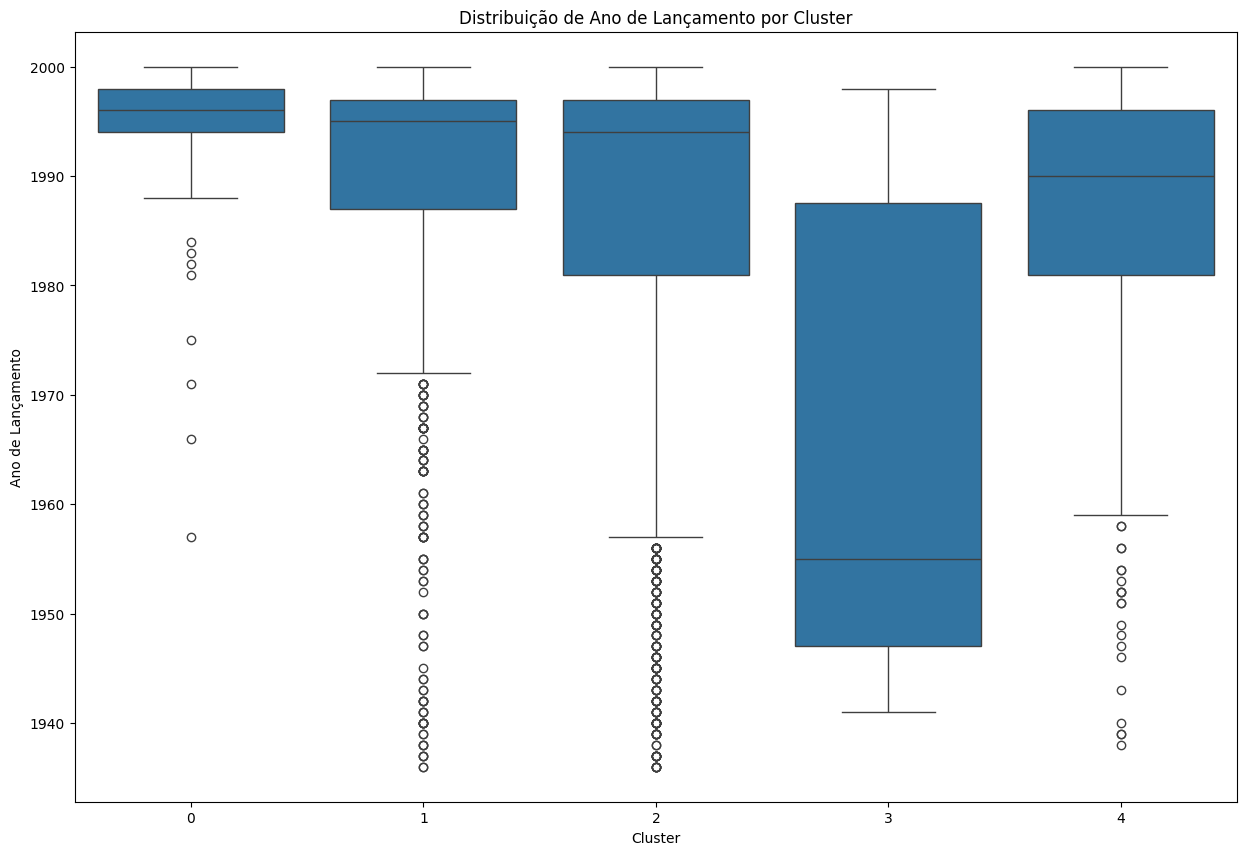

In [345]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='ClusterK', y='Year', data=data_no_outliers_z)
plt.title('Distribuição de Ano de Lançamento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ano de Lançamento')
plt.show()

O Cluster 3 mostra a maior variabilidade nos anos de lançamento, indicando que este cluster agrupa filmes de uma ampla gama de períodos. O Cluster 0 tem a menor variabilidade, agrupando filmes mais recentes (em torno do ano 2000). Clusters 1 e 4 mostram a presença de filmes mais antigos, o que pode indicar que esses clusters incluem uma maior diversidade temporal de filmes.

In [346]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [347]:
mean_ratings = df_ratings.groupby('MovieID')['Rating'].mean().reset_index()
mean_ratings.head()

,MovieID,Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757


In [348]:
data_no_outliers_z = pd.merge(data_no_outliers_z, mean_ratings, on='MovieID', how='left')
data_no_outliers_z.head()

,MovieID,Title,Genres,Year,ClusterK,ClusterDBSCAN,ClusterAgg,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1,0,1,4.146846
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,4,1,1,3.201141
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1,2,0,3.016736
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1,3,0,2.729412
4,5,Father of the Bride Part II (1995),Comedy,1995,1,4,0,3.006757


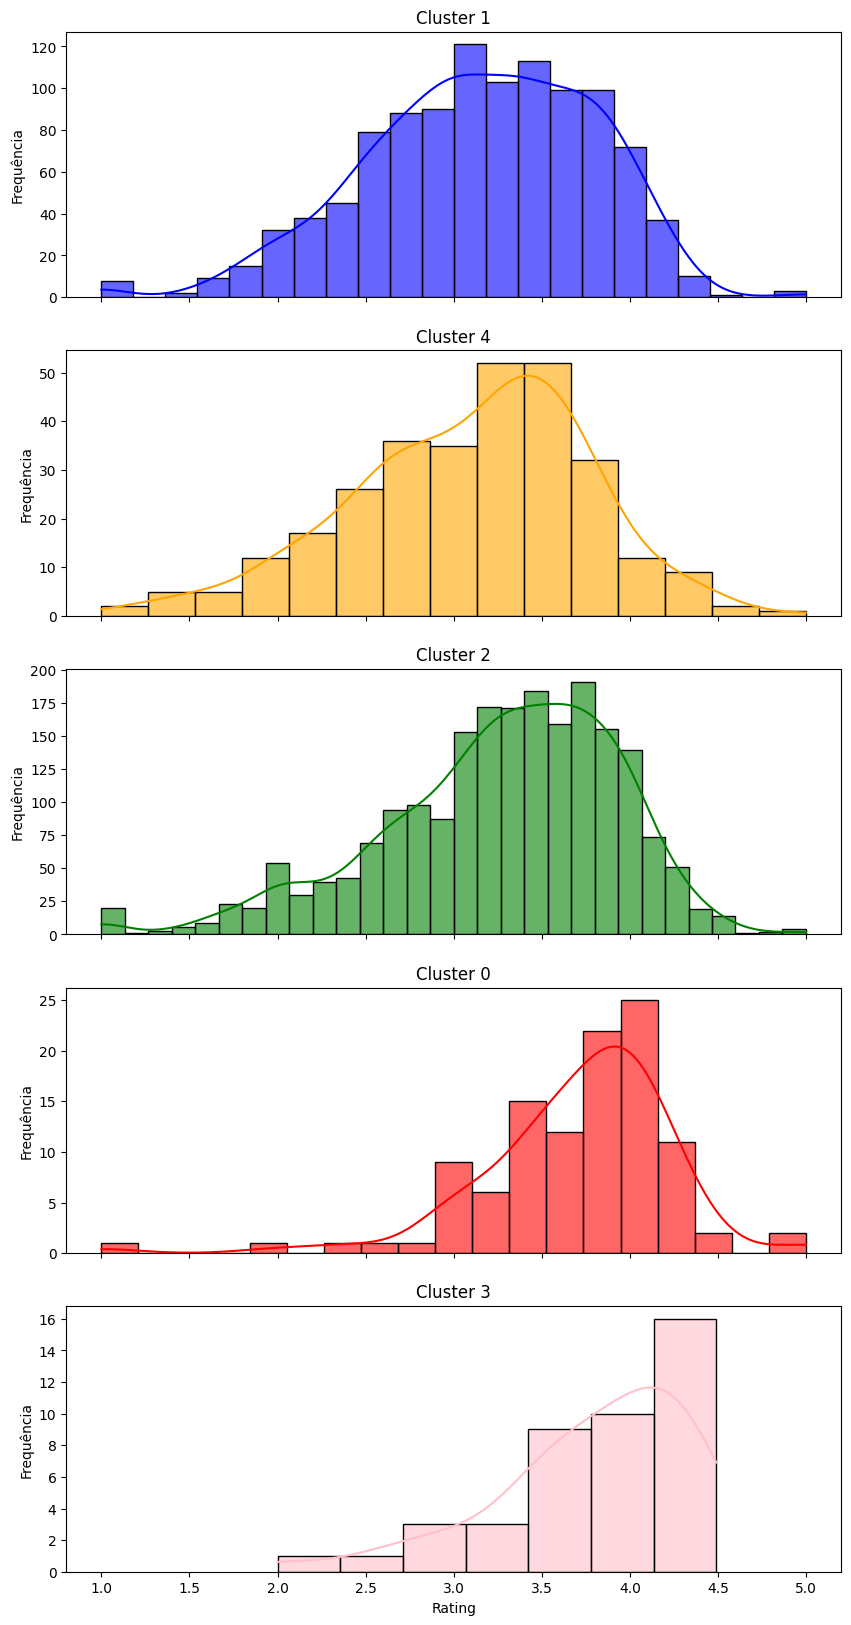

In [349]:
clusters = data_no_outliers_z['ClusterK'].unique()
n_clusters = len(clusters)

fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 20), sharex=True)

colors = ['blue', 'orange', 'green', 'red', 'pink']
for idx, cluster in enumerate(clusters):
    sns.histplot(data_no_outliers_z[data_no_outliers_z['ClusterK'] == cluster]['Rating'], 
                 kde=True, alpha=0.6, color=colors[idx], ax=axes[idx])
    axes[idx].set_title(f'Cluster {cluster}')
    axes[idx].set_xlabel('Rating')
    axes[idx].set_ylabel('Frequência')

Os clusters 1 e 2 sao semelhantes com mediana por volta de 3.5, o cluster 4 apresenta uma mediana em 3, o cluster 0 tem uma distribuicao mais assimetrica tentendo a 4, e o cluster 3 tendendo a 4,5

In [350]:
descriptive_stats = data_no_outliers_z.groupby('ClusterK').describe()
print(descriptive_stats)

         MovieID                                                             \
           count         mean          std    min      25%     50%      75%   
ClusterK                                                                      
0          126.0  1877.341270  1182.441726   37.0   890.50  1700.0  2983.25   
1         1096.0  1988.430657  1165.202652    1.0   925.50  2050.5  3003.25   
2         2197.0  1992.531634  1153.759216    6.0   979.00  1986.0  2994.00   
3           43.0  1892.558140  1031.200417  164.0  1110.50  1617.0  2833.50   
4          300.0  1814.643333  1087.940011    2.0   936.25  1848.5  2619.75   

                    Year               ... ClusterAgg       Rating            \
             max   count         mean  ...        75%  max   count      mean   
ClusterK                               ...                                     
0         3913.0   126.0  1994.706349  ...        3.0  3.0   109.0  3.703370   
1         3948.0  1096.0  1989.677007  ...     

- Cluster 0 contém filmes mais recentes (média de 1994) e com avaliações mais altas em média (3.70).
- Cluster 1 tem uma distribuição ampla de MovieID e filmes lançados em média em 1989, com avaliações mais baixas (3.15).
- Cluster 2 possui a maior quantidade de filmes, lançados em média em 1986, com uma média de rating de 3.27.
- Cluster 3 é o menor cluster, contendo filmes mais antigos (média de 1964) com avaliações relativamente altas (3.79).
- Cluster 4 também contém filmes relativamente antigos (média de 1985) com a média de rating mais baixa entre os clusters (3.10).

- Claramente são clusters bem distintos entre si

Em conclusão a analise de K means foi a com melhor resultado de clusterização, e com 5 clusters, a maior dificuldade foi definir a quantidade ideal de clusters, já que os resultados eram parecidos. Uma possivel melhoria seria explorar mais cada usuário e suas preferências, e explorar mais os outros algoritmos de clusterização